# Introduction

There is an interesting correspondence between the two most popular families of classification algorithms: Neural Networks and Support Vector Machines. They both start with a classification problem with 2 linearly separable classes, move to 2 almost linear separable classes, to problems with many classes, and then to problems with nonlinear boundaries. The correspondence is given in the table below:

| Neural Networks | Support Vector Machines | Properties |
|-----------------|-------------------------|------------|
| Perceptron      | Hard Margin SVM         | Linearly separable classes |
| Multi-layer perceptron | Soft Margin SVM    | Almost linearly separable classes |
|Softmax Regression| One-vs-All SVM          | Multi-class classification |
|Multi-layer Perceptron| Kernel SVM           | Non Linear Boundaries |

The basic idea of ​​Kernel SVM and kernel methods in general is to find a transformation such that the original data which is not linearly differentiable is transformed into a new space. In this new space, the data becomes linearly differentiable.

Consider the following example of transforming non-linearly differentiable data in a two-dimensional space into linearly differentiable data in a three-dimensional space by introducing a new dimension:

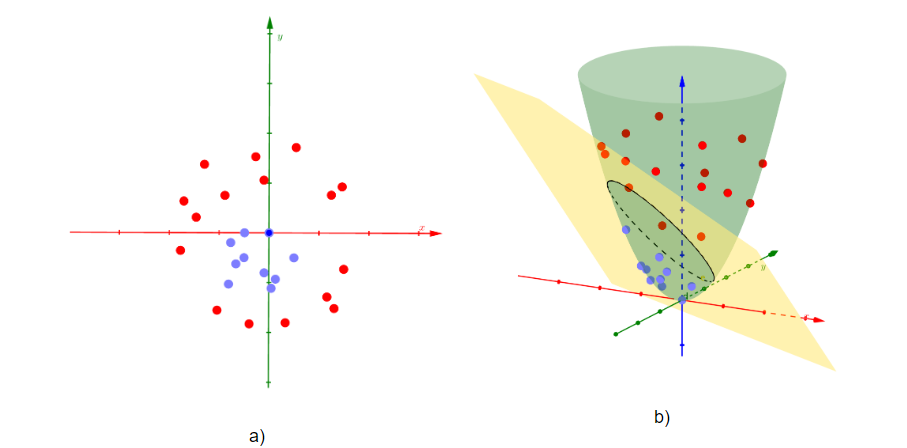

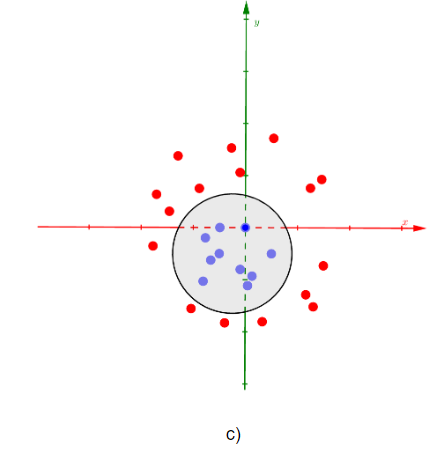

We consider:
- $a)$ The data of the two classes are not linearly separable in two-dimensional space.
- $b)$ If we consider the third dimension as a function of the other two dimensions $z = x^2 + y^2$, the data becomes linearly separable in three-dimensional space. The yellow hyperplane called separating hyperplane, can be found by Hard/Soft Margin SVM.
- $c)$ The intersection of the found plane and the parabolic surface is an ellipse. When projecting all the data as well as this ellipse onto the original two-dimensional space, we have found the line dividing the two classes.

In short, Kernel SVM is the task of finding a function that transforms data $x$ from the original feature space into data in a new space using the function $\phi(x)$. This function needs to satisfy our goal: in the new space, the data between the two classes are linearly or nearly linearly distinct. Then we can use conventional method like: PLA, Logistic Regression, SVM, etc. to classify the data.

# Mathematical Concepts

Recall Duality problem in Soft Margin SVM for semi-linearly separable data:

$$\lambda = \arg \max_{\lambda} \left( \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j x_i^T x_j \right) \\
\text{subject to:} \sum_{i=1}^{n} \lambda_i y_i = 0 \\ 0 \leq \lambda_i \leq C, i = 1, 2, ..., n \tag{1}$$

Where:
- $n$ is the number of data points.
- $x_i$ is the $i$-th data point.
- $y_i$ is the label of the $i$-th data point.
- $\lambda_i$ is the Lagrange multiplier of the $i$-th data point.
- $C$ is the penalty parameter.

After finding the optimal $\lambda$ for $(1)$, we can find the weight vector $w$ and the bias $b$ as follows:

$$\sum_{m \in \mathcal{S}} \lambda_m y_m x_m^Tx + \frac{1}{N_{\mathcal{M}}} \sum_{i \in \mathcal{M}} (y_i - \sum_{m \in \mathcal{S}} \lambda_m y_m x_m^Tx_i) \tag{2}$$

Where:
- $\mathcal{S}$ is the set of support vectors.
- $\mathcal{M}$ is the set of misclassified data points.
- $N_{\mathcal{M}}$ is the number of misclassified data points.

For real data, it's hard to find a dataset that semi-linearly separable. So the solution of the problem cannot created a good classifier. Assume that we can find $\phi()$ such that after transforming the data, the data is linearly separable. Then we can rewrite the problem as follows:

$$\lambda = \arg \max{\lambda} \left( \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j \phi(x_i)^T \phi(x_j) \right) \tag{3}\\
\text{subject to:} \sum_{i=1}^{n} \lambda_i y_i = 0 \\ 0 \leq \lambda_i \leq C, i = 1, 2, ..., n$$

And the label of a data point $x$ can be identified as follows:

$$w^T \phi(x) + b = \sum_{m \in \mathcal{S}} \lambda_m y_m \phi(x_m)^T \phi(x) + \frac{1}{N_{\mathcal{M}}} \sum_{i \in \mathcal{M}} (y_i - \sum_{m \in \mathcal{S}} \lambda_m y_m \phi(x_m)^T \phi(x_i)) \tag{4}$$

If we directly calculate $\phi(x_i)^T \phi(x_j)$, it will be very expensive. So we consider 2 equations $(3)$, $(4)$ just write above, we don't have to calculate $\phi(x)$ for each data point. We only need to calculate $\phi(x)^T \phi(z)$ by any two data points $x$ and $z$. This is the kernel trick.

Instead of directly calculating the coordinates of a point in the new space, we calculate the dot product between two points in the new space, commonly known as the kernel method.

Now, by define kernel function $k(x, z) = \phi(x)^T \phi(z)$, we can rewrite the problem as follows:

$$\lambda = \arg \max{\lambda} \left( \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j k(x_i, x_j) \right) \\
\text{subject to:} \sum_{i=1}^{n} \lambda_i y_i = 0 \\ 0 \leq \lambda_i \leq C, i = 1, 2, ..., n \tag{5}$$

And:

$$\sum_{m \in \mathcal{S}} \lambda_m y_m k(x_m, x) + \frac{1}{N_{\mathcal{M}}} \sum_{i \in \mathcal{M}} (y_i - \sum_{m \in \mathcal{S}} \lambda_m y_m k(x_m, x_i)) \tag{6}$$

Example: Consider the transformation of 1 data point $x$ in two dimensional $x = [x_1, x_2]$ into five dimensional space $z = [z_1, z_2, z_3, z_4, z_5]$ by the function $\phi(x) = [1, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2, x_2^2]$. We have:

$$\phi(x)^T \phi(z) = [1, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2, x_2^2] [1, \sqrt{2}z_1, \sqrt{2}z_2, \sqrt{2}z_1z_2, z_2^2] \\ = 1 + 2x_1z_1 + 2x_2z_2 + 2x_1x_2z_1z_2 + x_2^2z_2^2 \\= (1 + x_1z_1 + x_2z_2)^2 \\= (1 + x^Tz)^2 \\= k(x, z)$$

# Kernel Functions

### Kernel function properties

Not every kernel function $k()$ can be used. Kernel functions must satisfy the following properties:
- Symmetry: $k(x, z) = k(z, x)$. This property ensures that the dot product between two vectors is symmetric.
- Theoretical requirement: The kernel function must satisfy **Mercer's condition**:

$$\sum_{i = 1}^{n} \sum_{j = 1}^{n} k(x_i, x_j) c_i c_j \geq 0, \forall c_i \in \mathbb{R}^n, i = 1, 2, \cdots, N \tag{7}$$

This condition ensures that the objective function of the dual problem $(5)$ is convex.

- In practice, some kernel functions $k()$ do not meet Mercer's condition but still produce acceptable results. These functions are still called kernels. In this text, I will focus only on commonly used kernels that are available in standard libraries.

If a kernel function satisfy $(7)$ , consider $c_n = y_n \lambda_n$, we have:

$$\lambda^TK\lambda = \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j k(x_i, x_j) \geq 0, \forall \lambda_n \tag{8}$$

Where $K$ is the symmetric matrix with it's $i$-th row and $j$-th column element defined as:

$$K_{ij} = y_i y_j k(x_i, x_j)$$

From $(8)$, it follows that $K$ is a positive semi-definite matrix. Hence, the optimization problem $(5)$ is a convex optimization problem.

# Commonly used kernel functions

### Linear

This is a simple kernel function that calculates the dot product between two vectors:

$$k(x, z) = x^Tz$$

### Polynomial


$$k(x, z) = (r + \gamma x^Tz)^d$$

With $d$ is a positive number to define the degree of the polynomial, $r$ is a constant term, and $\gamma$ is a scaling factor.

### Radial Basis Function (RBF)

Or Gaussian kernel, most commonly used kernel function in real-world applications:

$$k(x, z) = \exp(-\gamma ||x - z||^2), \gamma > 0$$

### Sigmoid

$$k(x, z) = \tanh(\gamma x^Tz + r)$$

### Custom kernel

We can define our own kernel function. The only requirement is that the kernel function must satisfy Mercer's condition.